In [52]:
import requests
import json
import pandas as pd
import numpy as np
from config import api_key
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt



In [67]:
#write api call for 2017 data and get response
long_url2 = "https://api.census.gov/data/2017/acs/acs5/?get=B01001_001E,B19013_001E,NAME&for=county:*&key="
response2 = requests.get(long_url2+api_key)
print(response2)

<Response [200]>


In [68]:
#read json
response2=response2.json()

In [70]:
#convert to dataframe and clean up header
census_pd_2017 = pd.DataFrame(response2)
census_pd_2017.columns = census_pd_2017.iloc[0]
census_pd_2017 = census_pd_2017.iloc[1:]
census_pd_2017.head()


,B01001_001E,B19013_001E,NAME,state,county
1,34933,14752,"Corozal Municipio, Puerto Rico",72,047
2,11297,17636,"Maunabo Municipio, Puerto Rico",72,095
3,21661,16868,"Peñuelas Municipio, Puerto Rico",72,111
4,148863,16561,"Ponce Municipio, Puerto Rico",72,113
5,38970,14275,"San Sebastián Municipio, Puerto Rico",72,131


In [71]:
#rename columns
census_pd_2017 = census_pd_2017.rename(columns={"B01001_001E": "2017 Pop","B19013_001E": "2017 Household Income","NAME": "County"})
census_pd_2017.head()

,2017 Pop,2017 Household Income,County,state,county
1,34933,14752,"Corozal Municipio, Puerto Rico",72,047
2,11297,17636,"Maunabo Municipio, Puerto Rico",72,095
3,21661,16868,"Peñuelas Municipio, Puerto Rico",72,111
4,148863,16561,"Ponce Municipio, Puerto Rico",72,113
5,38970,14275,"San Sebastián Municipio, Puerto Rico",72,131


In [72]:
#make API call for 2012 data and read json
long_url3 = "https://api.census.gov/data/2012/acs/acs5/?get=B01001_001E,B19013_001E,NAME&for=county:*&key="
response3 = requests.get(long_url3+api_key)
print(response3)

response3=response3.json()

<Response [200]>


In [73]:
#convert to dataframe
census_pd_2012 = pd.DataFrame(response3)
census_pd_2012.columns = census_pd_2012.iloc[0]
census_pd_2012 = census_pd_2012.iloc[1:]
census_pd_2012.head()

,B01001_001E,B19013_001E,NAME,state,county
1,54590,53773,"Autauga County, Alabama",01,001
2,183226,50706,"Baldwin County, Alabama",01,003
3,27469,31889,"Barbour County, Alabama",01,005
4,22769,36824,"Bibb County, Alabama",01,007
5,57466,45192,"Blount County, Alabama",01,009


In [74]:
#rename columns
census_pd_2012 = census_pd_2012.rename(columns={"B01001_001E": "2012 Pop","B19013_001E": "2012 Household Income","NAME": "County"})
census_pd_2012.head()

,2012 Pop,2012 Household Income,County,state,county
1,54590,53773,"Autauga County, Alabama",01,001
2,183226,50706,"Baldwin County, Alabama",01,003
3,27469,31889,"Barbour County, Alabama",01,005
4,22769,36824,"Bibb County, Alabama",01,007
5,57466,45192,"Blount County, Alabama",01,009


In [75]:
#merge 2012 and 2017 df's 
census_final = pd.merge(census_pd_2012,census_pd_2017, on="County", how="inner")

In [76]:
census_final.head()

,2012 Pop,2012 Household Income,County,state_x,county_x,2017 Pop,2017 Household Income,state_y,county_y
0,54590,53773,"Autauga County, Alabama",01,001,55036,55317,01,001
1,183226,50706,"Baldwin County, Alabama",01,003,203360,52562,01,003
2,27469,31889,"Barbour County, Alabama",01,005,26201,33368,01,005
3,22769,36824,"Bibb County, Alabama",01,007,22580,43404,01,007
4,57466,45192,"Blount County, Alabama",01,009,57667,47412,01,009


In [77]:
#clean up columns
census_final = census_final.drop(census_final.columns[[3,4,7, 8]], axis=1)

In [78]:
#reorder columns
census_final = census_final[['County','2012 Pop', '2012 Household Income','2017 Pop', '2017 Household Income']]

In [79]:
census_final.head()

,County,2012 Pop,2012 Household Income,2017 Pop,2017 Household Income
0,"Autauga County, Alabama",54590,53773,55036,55317
1,"Baldwin County, Alabama",183226,50706,203360,52562
2,"Barbour County, Alabama",27469,31889,26201,33368
3,"Bibb County, Alabama",22769,36824,22580,43404
4,"Blount County, Alabama",57466,45192,57667,47412


In [80]:
#export to CSV 
census_final.to_csv("Output/census.csv")

In [81]:
#shorten df name for easier editing and convert number columns to numeric
df = census_final
df[["2012 Pop","2012 Household Income", "2017 Pop", "2017 Household Income"]] = df[["2012 Pop","2012 Household Income", "2017 Pop", "2017 Household Income"]].apply(pd.to_numeric)
df.dtypes

0
County                   object
2012 Pop                  int64
2012 Household Income     int64
2017 Pop                  int64
2017 Household Income     int64
dtype: object

In [83]:
#create Growth Columns
df["Pop Growth"] = df['2017 Pop'] - df['2012 Pop']
df["Income Growth"] = df['2017 Household Income'] - df['2012 Household Income']
df.head()

,County,2012 Pop,2012 Household Income,2017 Pop,2017 Household Income,Pop Growth,Income Growth
0,"Autauga County, Alabama",54590,53773,55036,55317,446,1544
1,"Baldwin County, Alabama",183226,50706,203360,52562,20134,1856
2,"Barbour County, Alabama",27469,31889,26201,33368,-1268,1479
3,"Bibb County, Alabama",22769,36824,22580,43404,-189,6580
4,"Blount County, Alabama",57466,45192,57667,47412,201,2220


In [84]:
#Create Growth % columns

df["Pop Growth %"] = (df['Pop Growth']/df['2017 Pop'])*100
df["Income Growth %"] = (df['Income Growth']/df['2012 Household Income'])*100
df.style.format({"Pop Growth %":"{:,.2f}",
                "Income Growth %": "{:,.2f}"})
df.head()

,County,2012 Pop,2012 Household Income,2017 Pop,2017 Household Income,Pop Growth,Income Growth,Pop Growth %,Income Growth %
0,"Autauga County, Alabama",54590,53773,55036,55317,446,1544,0.810379,2.871329
1,"Baldwin County, Alabama",183226,50706,203360,52562,20134,1856,9.900669,3.660316
2,"Barbour County, Alabama",27469,31889,26201,33368,-1268,1479,-4.839510,4.637963
3,"Bibb County, Alabama",22769,36824,22580,43404,-189,6580,-0.837024,17.868781
4,"Blount County, Alabama",57466,45192,57667,47412,201,2220,0.348553,4.912374


In [86]:
#focus on counties with populations greater than 200,000

New_df = df.loc[(df['2017 Pop']>200000)]
New_df.head()


,County,2012 Pop,2012 Household Income,2017 Pop,2017 Household Income,Pop Growth,Income Growth,Pop Growth %,Income Growth %
1,"Baldwin County, Alabama",183226,50706,203360,52562,20134,1856,9.900669,3.660316
36,"Jefferson County, Alabama",658464,45415,659460,49321,996,3906,0.151033,8.600683
44,"Madison County, Alabama",334661,58242,353213,61318,18552,3076,5.252355,5.281412
70,"Weld County, Colorado",253552,56589,285729,66489,32177,9900,11.261370,17.494566
72,"Fairfield County, Connecticut",918892,82614,947328,89773,28436,7159,3.001706,8.665601


In [87]:
#export raw data to CSV
New_df.to_csv("Output/Census_N.csv")

In [89]:
#make column that adds Income and Population Growth

New_df["Combined Growth"] = New_df["Pop Growth %"] + New_df["Income Growth %"]
New_df.head()



,County,2012 Pop,2012 Household Income,2017 Pop,2017 Household Income,Pop Growth,Income Growth,Pop Growth %,Income Growth %,Combined Growth
1,"Baldwin County, Alabama",183226,50706,203360,52562,20134,1856,9.900669,3.660316,13.560985
36,"Jefferson County, Alabama",658464,45415,659460,49321,996,3906,0.151033,8.600683,8.751715
44,"Madison County, Alabama",334661,58242,353213,61318,18552,3076,5.252355,5.281412,10.533767
70,"Weld County, Colorado",253552,56589,285729,66489,32177,9900,11.261370,17.494566,28.755936
72,"Fairfield County, Connecticut",918892,82614,947328,89773,28436,7159,3.001706,8.665601,11.667307


In [92]:
#sort by Combined Growth
New_df.sort_values(["Combined Growth"], ascending=[False], inplace = True)
New_df.reset_index(drop=True,inplace=True)
New_df.head(10)

,County,2012 Pop,2012 Household Income,2017 Pop,2017 Household Income,Pop Growth,Income Growth,Pop Growth %,Income Growth %,Combined Growth
0,"San Francisco County, California",807755,73802,864263,96265,56508,22463,6.538288,30.436845,36.975132
1,"Denver County, Colorado",604356,49091,678467,60098,74111,11007,10.923302,22.421625,33.344927
2,"Travis County, Texas",1034842,56403,1176584,68350,141742,11947,12.046909,21.181497,33.228406
3,"District of Columbia, District of Columbia",605759,64267,672391,77649,66632,13382,9.909710,20.822506,30.732216
4,"St. Johns County, Florida",191495,64346,226578,73640,35083,9294,15.483851,14.443788,29.927639
5,"Weld County, Colorado",253552,56589,285729,66489,32177,9900,11.261370,17.494566,28.755936
6,"Fort Bend County, Texas",587666,84211,711421,93645,123755,9434,17.395466,11.202812,28.598278
7,"Williamson County, Texas",426296,70849,508313,79123,82017,8274,16.135137,11.678358,27.813495
8,"Alameda County, California",1515136,71516,1629615,85743,114479,14227,7.024911,19.893450,26.918361
9,"Williamson County, Tennessee",184225,91146,212161,103543,27936,12397,13.167359,13.601255,26.768614


In [93]:
#get top 10 cities
N = 10
popRank = New_df.iloc[0:10,7]
incRank = New_df.iloc[0:10,8]
ind = np.arange(N)
print(popRank)

0     6.538288
1    10.923302
2    12.046909
3     9.909710
4    15.483851
5    11.261370
6    17.395466
7    16.135137
8     7.024911
9    13.167359
Name: Pop Growth %, dtype: float64


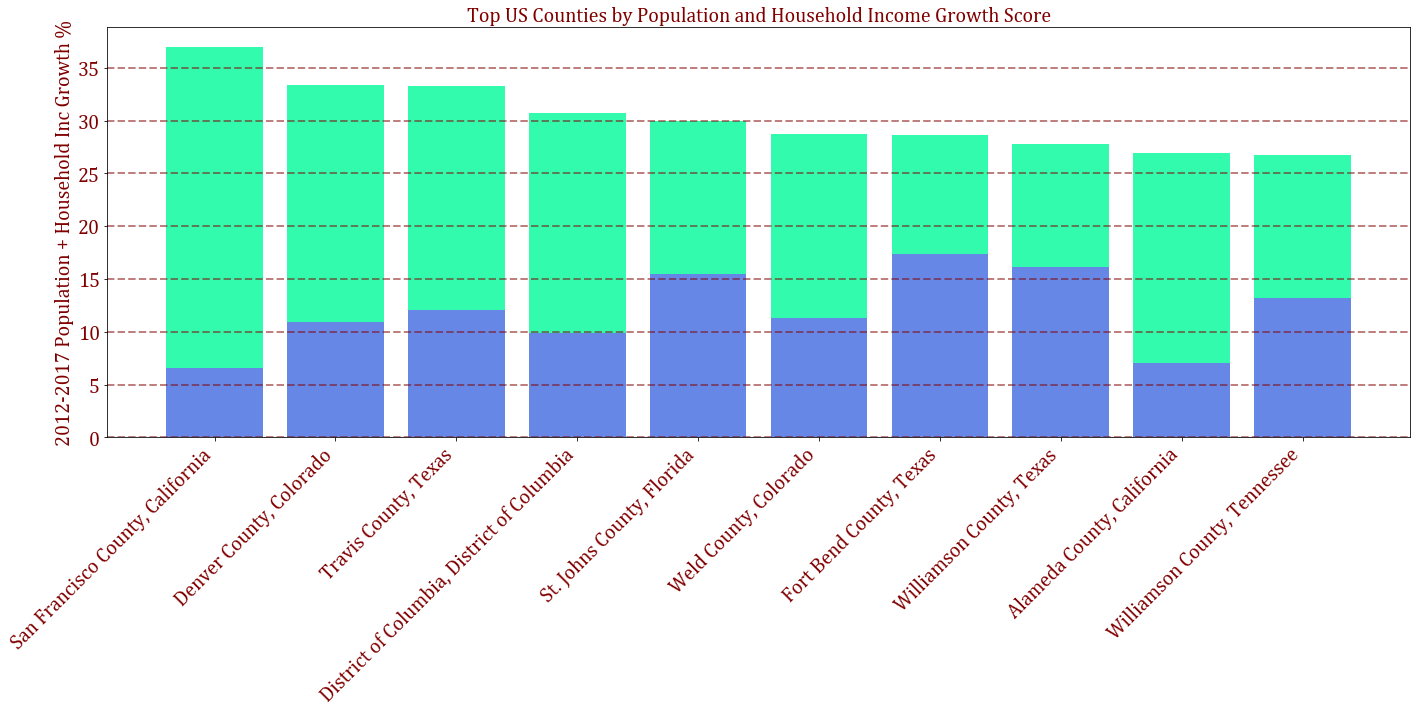

In [96]:
#graph top 10 counties by combined growth


plt.figure(figsize=(20,10))


p1 = plt.bar(ind, popRank,color='royalblue', alpha=0.8, align = "center" )
p2 = plt.bar(ind, incRank, bottom=popRank, color='mediumspringgreen', alpha=0.8, align = "center")

plt.ylabel('2012-2017 Population + Household Inc Growth %', color = "maroon", fontname="Cambria", fontsize=20)
plt.title('Top US Counties by Population and Household Income Growth Score', color = "maroon", fontname="Cambria", fontsize=20)
plt.yticks(color = "maroon", fontname="Cambria", fontsize=20)
plt.xticks(ind, New_df.iloc[0:10,0], rotation = 45, color = "maroon", fontname="Cambria", fontsize=20, ha="right")
plt.grid(which='major', axis='y', color = "maroon", linestyle='--', linewidth=2, alpha = 0.5)

plt.tight_layout()
plt.savefig("Output/Inc_Pop.png")
plt.show()


In [97]:
#sort by Population
New_df.sort_values(["Pop Growth %"], ascending=[False], inplace = True)
New_df.head()



,County,2012 Pop,2012 Household Income,2017 Pop,2017 Household Income,Pop Growth,Income Growth,Pop Growth %,Income Growth %,Combined Growth
6,"Fort Bend County, Texas",587666,84211,711421,93645,123755,9434,17.395466,11.202812,28.598278
35,"Osceola County, Florida",272355,44887,325168,47343,52813,2456,16.241758,5.471517,21.713275
11,"Forsyth County, Georgia",177103,87585,211300,96445,34197,8860,16.184098,10.115887,26.299986
7,"Williamson County, Texas",426296,70849,508313,79123,82017,8274,16.135137,11.678358,27.813495
32,"Loudoun County, Virginia",314980,122068,374558,129588,59578,7520,15.906215,6.160501,22.066715


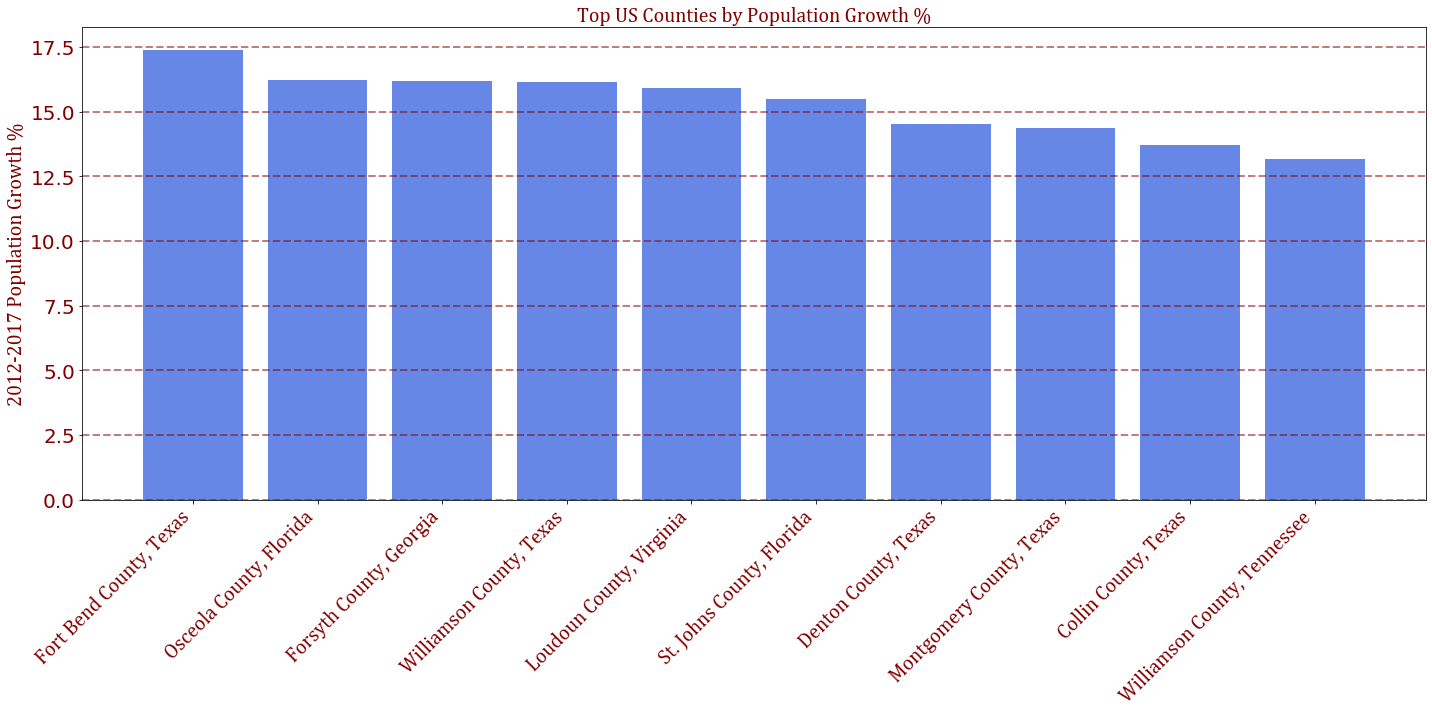

In [100]:
#graph counties by Population Growth

x_axis = np.arange(N)
tick_locations = [value+0.4 for value in x_axis]

popRank = New_df.iloc[0:10,7]
Metro = New_df.iloc[0:10,0]


# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,10))
plt.bar(x_axis, popRank, color='royalblue', alpha=0.8, align = "edge")
plt.xticks(tick_locations, Metro, color = "maroon", rotation=45,fontname="Cambria", fontsize = 20, ha = "right")

# plt.xlabel("Metro Area", fontsize = 20)
plt.ylabel("2012-2017 Population Growth %",color = "maroon", fontname="Cambria", fontsize=20)
plt.yticks(color = "maroon", fontsize=20)
plt.grid(which='major', axis='y', color = "maroon", linestyle='--', linewidth=2, alpha = 0.5)
plt.title("Top US Counties by Population Growth %",color = "maroon",fontname="Cambria", fontsize=20)
plt.tight_layout()
plt.savefig("Output/Pop_df{}.png")



In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

# Import business dataset from resources
biz1_df = pd.read_json('Resources/yelp_academic_dataset_business.json', lines=True)

# save the row data for 
biz1_df = biz1_df.loc[(biz1_df['name'] == "The Halal Guys") |               # 10
                      (biz1_df['name'] == "Chipotle Mexican Grill") |       # 183
                      (biz1_df['name'] == "Taco Bell") |                    # 313
                      (biz1_df['name'] == "McDonald's") |                   # 806
                      (biz1_df['name'] == "Panera Bread") |                 # 157
                      (biz1_df['name'] == "Five Guys Burgers and Fries") |  # 10
                      (biz1_df['name'] == "Five Guys") |                    # 99
                      (biz1_df['name'] == "Texas Roadhouse") |              # 24
                      (biz1_df['name'] == "Shake Shack")                    # 10
                       , :]  

# 'Five Guys' will need to combine with 'Five Guys Burgers and Fries'
biz1_df['name'] = biz1_df['name'].replace({"Five Guys Burgers and Fries":"Five Guys"})
biz1_df['name'].value_counts()

McDonald's                806
Taco Bell                 313
Chipotle Mexican Grill    183
Panera Bread              157
Five Guys                 109
Texas Roadhouse            24
Shake Shack                10
The Halal Guys             10
Name: name, dtype: int64

In [2]:
# save the business name, latitude, longitude, city, state, review_count, stars
biz2_df = biz1_df.loc[:, ["name", "latitude", "longitude", "city", "state", "review_count", "stars"]]
biz2_df.head()

,name,latitude,longitude,city,state,review_count,stars
11,Taco Bell,33.495194,-112.028588,Phoenix,AZ,18,3.0
298,Five Guys,33.378699,-112.031013,Phoenix,AZ,23,3.5
381,Panera Bread,33.248168,-111.839765,Chandler,AZ,21,2.5
542,Chipotle Mexican Grill,36.120095,-115.171769,Las Vegas,NV,115,3.5
628,Panera Bread,43.856858,-79.434457,Richmond Hill,ON,53,3.0


In [3]:
# Groupby resturant and star rating
biz3_df = biz2_df.loc[:,["name","stars","review_count"]]
biz3_df = biz3_df.groupby(["name","stars"]).agg({"review_count":"sum"})
# This also works: biz3_df = biz3_df.groupby(["name","stars"]).sum()
biz3_df.head()

review_count
name                   stars              
Chipotle Mexican Grill 1.0               3
                       1.5             285
                       2.0             316
                       2.5            1978
                       3.0            3769

In [4]:
# Pivot the name index (row headers) to a column header
biz3_df = biz3_df.unstack(0)
biz3_df.columns = biz3_df.columns.get_level_values(1)

# Data Munging: Fill in the NaN and combine 'Five Guys' with 'Five Guys Burgers and Fries'
biz3_df = biz3_df.fillna(0)

# This DataFrame shows the weighted average star ratings of each franchise from 1.0 to 5.0
biz3_df

name,Chipotle Mexican Grill,Five Guys,McDonald's,Panera Bread,Shake Shack,Taco Bell,Texas Roadhouse,The Halal Guys
stars,,,,,,,,
1.0,3.0,0.0,684.0,0.0,0.0,56.0,0.0,0.0
1.5,285.0,4.0,4759.0,113.0,0.0,552.0,0.0,0.0
2.0,316.0,0.0,5462.0,646.0,0.0,934.0,0.0,0.0
2.5,1978.0,67.0,2214.0,2346.0,0.0,1644.0,0.0,19.0
3.0,3769.0,738.0,912.0,2149.0,0.0,1139.0,242.0,344.0
3.5,2718.0,2637.0,230.0,1181.0,1774.0,470.0,3031.0,935.0
4.0,197.0,1473.0,54.0,32.0,3297.0,235.0,0.0,74.0
4.5,0.0,116.0,13.0,22.0,0.0,4.0,0.0,0.0
5.0,0.0,12.0,0.0,0.0,0.0,0.0,5.0,0.0


In [5]:
# Chipotle: Make Histograms for Above Visualization
CMG = biz3_df["Chipotle Mexican Grill"].to_list()
CMG_xaxis = np.arange(len(CMG))
plt.bar(CMG_xaxis, CMG, color='black', alpha=0.5, align='center');
ticks = [value for value in CMG_xaxis]
plt.xticks(ticks,biz3_df.index.to_list());
plt.title("Chipotle Ratings Spread")
plt.xlabel("Star Rating")
plt.ylabel("Number of Reviews")

# Savfig and close display to save memory
plt.savefig("Output/Chipotle_Bar_Chart.png")
plt.close()

In [6]:
# Five Guys
CMG = biz3_df["Five Guys"].to_list()
CMG_xaxis = np.arange(len(CMG))
plt.bar(CMG_xaxis, CMG, color='red', alpha=0.5, align='center');
ticks = [value for value in CMG_xaxis]
plt.xticks(ticks,biz3_df.index.to_list());
plt.title("Five Guys Ratings Spread")
plt.xlabel("Star Rating")
plt.ylabel("Number of Reviews")

# Savfig and close display to save memory
plt.savefig("Output/Five_Guys_Chart.png")
plt.close()

In [7]:
# McDonald's
CMG = biz3_df["McDonald's"].to_list()
CMG_xaxis = np.arange(len(CMG))
plt.bar(CMG_xaxis, CMG, color='yellow', alpha=0.5, align='center');
ticks = [value for value in CMG_xaxis]
plt.xticks(ticks,biz3_df.index.to_list());
plt.title("McDonald's Ratings Spread")
plt.xlabel("Star Rating")
plt.ylabel("Number of Reviews")

# Savfig and close display to save memory
plt.savefig("Output/McDonalds_Chart.png")
plt.close()

In [8]:
# Panera
CMG = biz3_df["Panera Bread"].to_list()
CMG_xaxis = np.arange(len(CMG))
plt.bar(CMG_xaxis, CMG, color='brown', alpha=0.5, align='center');
ticks = [value for value in CMG_xaxis]
plt.xticks(ticks,biz3_df.index.to_list());
plt.title("Panera Ratings Spread")
plt.xlabel("Star Rating")
plt.ylabel("Number of Reviews")

# Savfig and close display to save memory
plt.savefig("Output/Panera_Chart.png")
plt.close()

In [9]:
# Shake Shack
CMG = biz3_df["Shake Shack"].to_list()
CMG_xaxis = np.arange(len(CMG))
plt.bar(CMG_xaxis, CMG, color='green', alpha=0.5, align='center');
ticks = [value for value in CMG_xaxis]
plt.xticks(ticks,biz3_df.index.to_list());
plt.title("Shake Shack Ratings Spread")
plt.xlabel("Star Rating")
plt.ylabel("Number of Reviews")

# Savfig and close display to save memory
plt.savefig("Output/Shake_Shack_Chart.png")
plt.close()

In [10]:
# Taco Bell
CMG = biz3_df["Taco Bell"].to_list()
CMG_xaxis = np.arange(len(CMG))
plt.bar(CMG_xaxis, CMG, color='purple', alpha=0.5, align='center');
ticks = [value for value in CMG_xaxis]
plt.xticks(ticks,biz3_df.index.to_list());
plt.title("Taco Bell Ratings Spread")
plt.xlabel("Star Rating")
plt.ylabel("Number of Reviews")

# Savfig and close display to save memory
plt.savefig("Output/Taco_Bell_Chart.png")
plt.close()

In [11]:
# Texas Roadhouse
CMG = biz3_df["Texas Roadhouse"].to_list()
CMG_xaxis = np.arange(len(CMG))
plt.bar(CMG_xaxis, CMG, color='orange', alpha=0.5, align='center');
ticks = [value for value in CMG_xaxis]
plt.xticks(ticks,biz3_df.index.to_list());
plt.title("Texas Roadhouse Ratings Spread")
plt.xlabel("Star Rating")
plt.ylabel("Number of Reviews")

# Savfig and close display to save memory
plt.savefig("Output/Texas_Roadhouse_Chart.png")
plt.close()

In [12]:
# Halal Guys
CMG = biz3_df["The Halal Guys"].to_list()
CMG_xaxis = np.arange(len(CMG))
plt.bar(CMG_xaxis, CMG, color='pink', alpha=0.5, align='center');
ticks = [value for value in CMG_xaxis]
plt.xticks(ticks,biz3_df.index.to_list());
plt.title("Halal Guys Ratings Spread")
plt.xlabel("Star Rating")
plt.ylabel("Number of Reviews")

# Savfig and close display to save memory
plt.savefig("Output/Halal_Guys_Chart.png")
plt.close()

In [48]:
# Condense the above DataFrame as shown to include cities
biz4_df = pd.DataFrame(biz1_df[['name','city','stars']])
biz4_df.head()

,name,city,stars
11,Taco Bell,Phoenix,3.0
298,Five Guys,Phoenix,3.5
381,Panera Bread,Chandler,2.5
542,Chipotle Mexican Grill,Las Vegas,3.5
628,Panera Bread,Richmond Hill,3.0


In [124]:
# Figure out which cities have the most of which franchises

# For each franchise, figure out top ten cities by open locations
chi_df = biz4_df.loc[biz4_df['name'] == "Chipotle Mexican Grill",:]
chi_df = chi_df['city'].value_counts(ascending=False)
chi_df = pd.DataFrame({"Chipotle":chi_df.index})

fiv_df = biz4_df.loc[biz4_df['name'] == "Five Guys",:]
fiv_df = fiv_df['city'].value_counts(ascending=False)
fiv_df = pd.DataFrame({"Five Guys":fiv_df.index})

hal_df = biz4_df.loc[biz4_df['name'] == "The Halal Guys",:]
hal_df = hal_df['city'].value_counts(ascending=False)
hal_df = pd.DataFrame({"Halal Guys":hal_df.index})

tac_df = biz4_df.loc[biz4_df['name'] == "Taco Bell",:]
tac_df = tac_df['city'].value_counts(ascending=False)
tac_df = pd.DataFrame({"Taco Bell":tac_df.index})

mcd_df = biz4_df.loc[biz4_df['name'] == "McDonald's",:]
mcd_df = mcd_df['city'].value_counts(ascending=False)
mcd_df = pd.DataFrame({"McDonald's":mcd_df.index})

mcd_df = biz4_df.loc[biz4_df['name'] == "McDonald's",:]
mcd_df = mcd_df['city'].value_counts(ascending=False)
mcd_df = pd.DataFrame({"McDonald's":mcd_df.index})

pan_df = biz4_df.loc[biz4_df['name'] == "Panera Bread",:]
pan_df = pan_df['city'].value_counts(ascending=False)
pan_df = pd.DataFrame({"Panera Bread":pan_df.index})

tex_df = biz4_df.loc[biz4_df['name'] == "Texas Roadhouse",:]
tex_df = tex_df['city'].value_counts(ascending=False)
tex_df = pd.DataFrame({"Texas Roadhouse":tex_df.index})

sha_df = biz4_df.loc[biz4_df['name'] == "Shake Shack",:]
sha_df = sha_df['city'].value_counts(ascending=False)
sha_df = pd.DataFrame({"Shake Shack":sha_df.index})

# Make the conbined DataFrame showing the Top Ten Cities by number of franchise locations
topten_df = pd.concat([chi_df, fiv_df, hal_df, tac_df, mcd_df, pan_df, tex_df, sha_df], axis=1)
topten_df.head(11)

,Chipotle,Five Guys,Halal Guys,Taco Bell,McDonald's,Panera Bread,Texas Roadhouse,Shake Shack
0,Las Vegas,Charlotte,Las Vegas,Las Vegas,Las Vegas,Charlotte,Phoenix,Las Vegas
1,Phoenix,Phoenix,MontrÃ©al,Phoenix,Phoenix,Pittsburgh,Gilbert,Scottsdale
2,Charlotte,Calgary,Phoenix,Charlotte,Toronto,Phoenix,Pittsburgh,Phoenix
3,Pittsburgh,Pittsburgh,Tempe,Mesa,Charlotte,Las Vegas,Brooklyn,Henderson
4,Scottsdale,Toronto,Toronto,Glendale,Calgary,Chandler,North Las Vegas,Orange Village
5,Toronto,Las Vegas,Mesa,Pittsburgh,MontrÃ©al,Madison,Elyria,Charlotte
6,Mesa,Mississauga,Mississauga,Cleveland,Pittsburgh,Scottsdale,Bridgeville,NaN
7,Cleveland,Henderson,NaN,Madison,Mesa,Tempe,Surprise,NaN
8,Glendale,Mesa,NaN,Scottsdale,Mississauga,Champaign,Mesa,NaN
9,Tempe,Strongsville,NaN,Tempe,Cleveland,Mississauga,Willoughby,NaN


In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import linregress

In [8]:
votes_df = pd.read_csv("Output/votes.csv")

In [9]:
votes_df

,Franchise,Rating,Store Count,Total Votes,Votes per Store
0,Chipotle Mexican Grill,2.98,183,9266,50.63
1,Five Guys,3.58,109,5047,46.30
2,McDonalds,1.96,806,14328,17.78
3,Panera Bread,2.79,157,6489,41.33
4,Shake Shack,3.83,10,5071,507.10
5,Taco Bell,2.56,313,5034,16.08
6,Texas Roadhouse,3.47,24,3278,136.58
7,The Halal Guys,3.39,10,1372,137.20


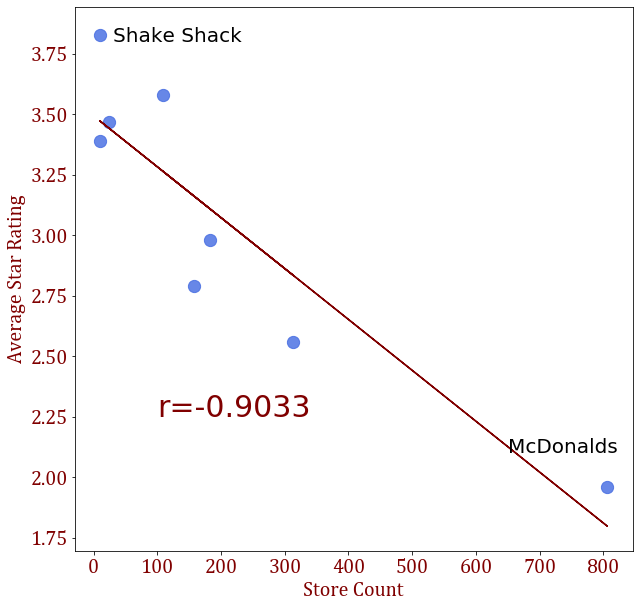

In [51]:
plt.figure(figsize=(10,10))
x_values = votes_df['Store Count']
y_values = votes_df['Rating']
plt.scatter(x_values,y_values, s = 150, color ='royalblue', alpha=0.8 )
plt.xlabel('Store Count', color = "maroon", fontname="Cambria", fontsize=20)
plt.ylabel('Average Star Rating', color = "maroon", fontname="Cambria", fontsize=20)
plt.xticks(color = "maroon", fontname="Cambria", fontsize=20)
plt.yticks(color = "maroon", fontname="Cambria", fontsize=20)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
r = str(round(rvalue,4))
plt.plot(x_values,regress_values,"-", color="maroon")
plt.annotate("r="+ r,(100,2.25),fontsize=30,color="maroon")
plt.annotate("Shake Shack", (30,3.8), fontsize = 20, color = "black")
plt.annotate("McDonalds", (650,2.1), fontsize = 20, color = "black")
plt.savefig("Output/Store_Count.png")
plt.show()

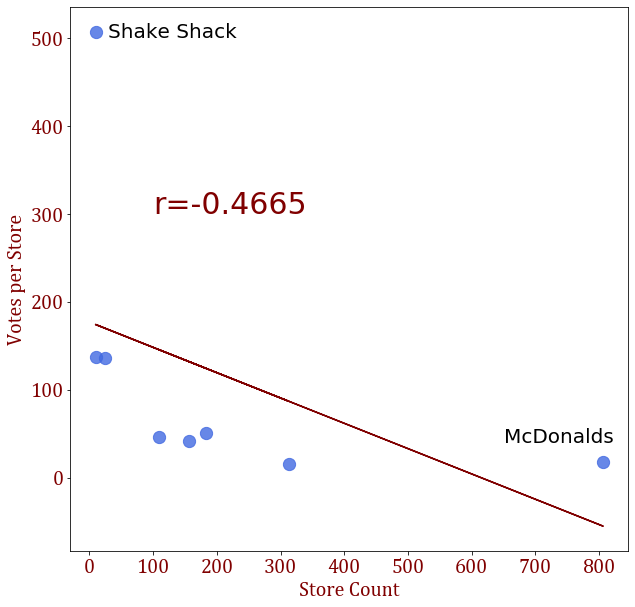

In [54]:
plt.figure(figsize=(10,10))
x_values = votes_df['Store Count']
y_values = votes_df['Votes per Store']
plt.scatter(x_values,y_values, s = 150, color ='royalblue', alpha=0.8 )
plt.xlabel('Store Count', color = "maroon", fontname="Cambria", fontsize=20)
plt.ylabel('Votes per Store', color = "maroon", fontname="Cambria", fontsize=20)
plt.xticks(color = "maroon", fontname="Cambria", fontsize=20)
plt.yticks(color = "maroon", fontname="Cambria", fontsize=20)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
r = str(round(rvalue,4))
plt.plot(x_values,regress_values,"-", color="maroon")
plt.annotate("r="+ r,(100,300),fontsize=30,color="maroon")
plt.annotate("Shake Shack", (30,500), fontsize = 20, color = "black")
plt.annotate("McDonalds", (650,40), fontsize = 20, color = "black")
plt.savefig("Output/Vote_Count.png")
plt.show()

In [68]:
%matplotlib notebook

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress

In [70]:
Timeline_df = pd.read_csv("combined.csv")
Timeline_df.head()

,Week,Chipotle,Five Guys,Halal Guys,McDonalds,Panera Bread,Shake Shack,Taco Bell,Texas Roadhouse
0,9/24/2017,65,73,74,55,88,46,61,48
1,10/1/2017,66,75,74,75,87,46,68,47
2,10/8/2017,61,75,71,65,91,100,66,48
3,10/15/2017,64,79,79,57,90,60,62,48
4,10/22/2017,67,77,75,57,91,53,64,47


In [71]:
Timeline_df.dtypes

Week               object
Chipotle            int64
Five Guys           int64
Halal Guys          int64
McDonalds           int64
Panera Bread        int64
Shake Shack         int64
Taco Bell           int64
Texas Roadhouse     int64
dtype: object

In [72]:
Timeline_df['Week'] = Timeline_df['Week'].astype('datetime64')

In [73]:
Timeline_df.dtypes

Week               datetime64[ns]
Chipotle                    int64
Five Guys                   int64
Halal Guys                  int64
McDonalds                   int64
Panera Bread                int64
Shake Shack                 int64
Taco Bell                   int64
Texas Roadhouse             int64
dtype: object

In [74]:
roll_change = {}

<IPython.core.display.Javascript object>


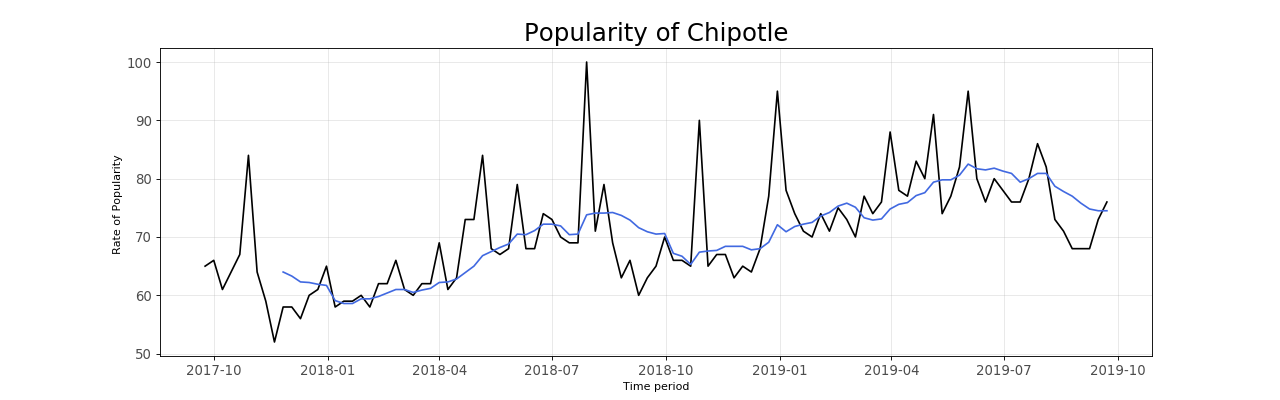

In [89]:
plt.figure(figsize=(16,5), dpi= 80)
plt.plot(Timeline_df['Week'], Timeline_df['Chipotle'],color='black')


x_values = Timeline_df["Week"]
y_values = Timeline_df["Chipotle"]

plt.xticks(rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Popularity of Chipotle", fontsize=22)
plt.xlabel('Time period')
plt.ylabel('Rate of Popularity ')
plt.grid(axis='both', alpha=.3)
rolling_mean = y_values.rolling(window=10).mean()

plt.plot(Timeline_df['Week'], rolling_mean,color='royalblue')
rm_change = (rolling_mean[104]/rolling_mean[9])-1
roll_change.update( {'Chipotle' : rm_change} )
plt.savefig("../Output/Chipotle_Timeline.png")
plt.show()


<IPython.core.display.Javascript object>


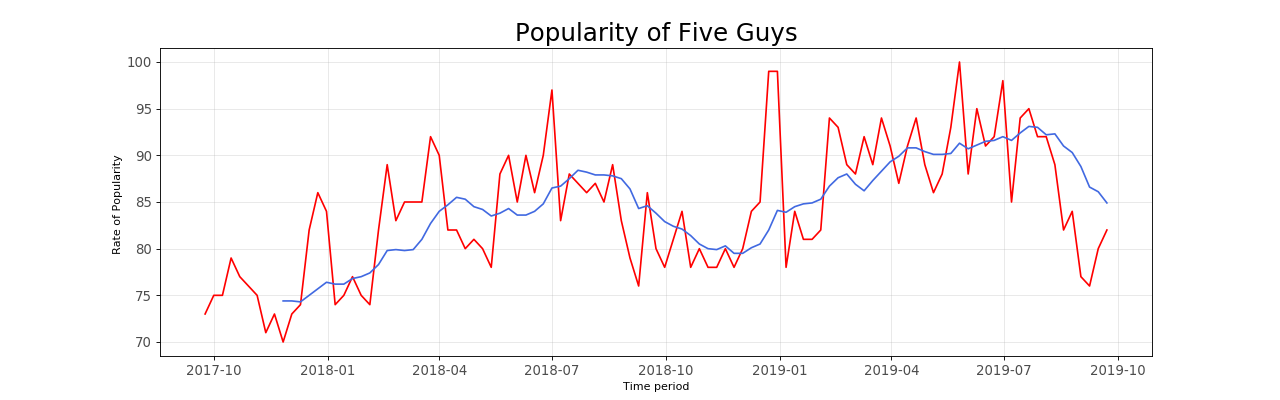

In [90]:
plt.figure(figsize=(16,5), dpi= 80)
plt.plot(Timeline_df['Week'], Timeline_df['Five Guys'],color='red')


x_values = Timeline_df["Week"]
y_values = Timeline_df["Five Guys"]

plt.xticks(rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Popularity of Five Guys", fontsize=22)
plt.xlabel('Time period')
plt.ylabel('Rate of Popularity ')
plt.grid(axis='both', alpha=.3)
rolling_mean = y_values.rolling(window=10).mean()


plt.plot(Timeline_df['Week'], rolling_mean,color='royalblue')
rm_change = (rolling_mean[104]/rolling_mean[9])-1
roll_change.update( {'Five Guys' : rm_change} )
plt.savefig("../Output/FiveGuys_Timeline.png")
plt.show()

<IPython.core.display.Javascript object>


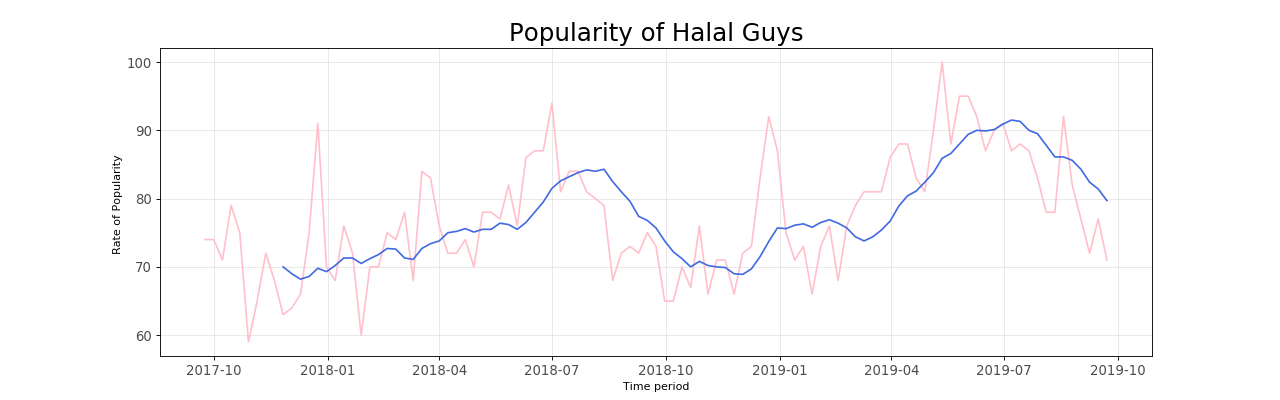

In [91]:
plt.figure(figsize=(16,5), dpi= 80)
plt.plot(Timeline_df['Week'], Timeline_df['Halal Guys'],color='pink')


x_values = Timeline_df["Week"]
y_values = Timeline_df["Halal Guys"]

plt.xticks(rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Popularity of Halal Guys", fontsize=22)
plt.xlabel('Time period')
plt.ylabel('Rate of Popularity ')
plt.grid(axis='both', alpha=.3)
rolling_mean = y_values.rolling(window=10).mean()


plt.plot(Timeline_df['Week'], rolling_mean,color='royalblue')
rm_change = (rolling_mean[104]/rolling_mean[9])-1
roll_change.update( {'Halal Guys' : rm_change} )
plt.savefig("../Output/Halal_Timeline.png")
plt.show()

<IPython.core.display.Javascript object>


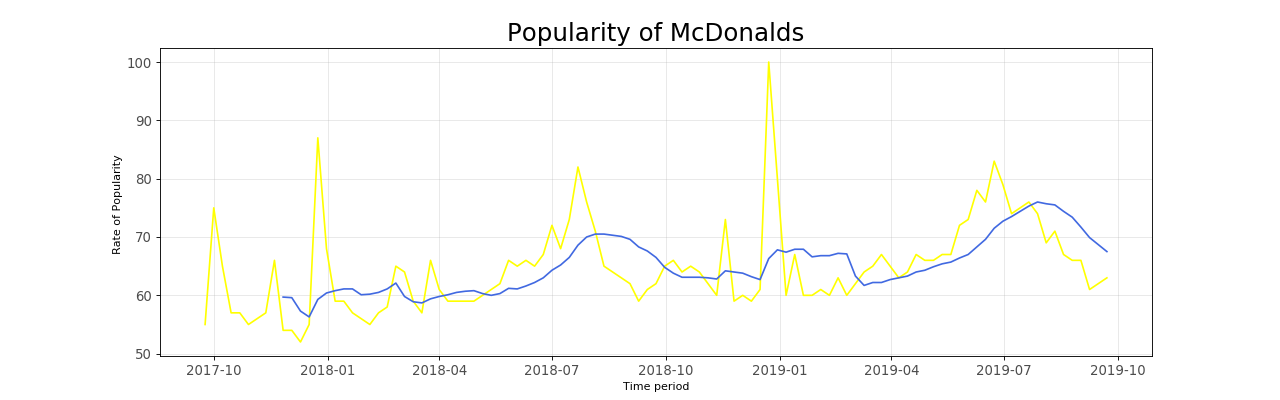

In [92]:
plt.figure(figsize=(16,5), dpi= 80)
plt.plot(Timeline_df['Week'], Timeline_df['McDonalds'],color='yellow')


x_values = Timeline_df["Week"]
y_values = Timeline_df["McDonalds"]

plt.xticks(rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Popularity of McDonalds", fontsize=22)
plt.xlabel('Time period')
plt.ylabel('Rate of Popularity ')
plt.grid(axis='both', alpha=.3)
rolling_mean = y_values.rolling(window=10).mean()


plt.plot(Timeline_df['Week'], rolling_mean,color='royalblue')
rm_change = (rolling_mean[104]/rolling_mean[9])-1
roll_change.update( {'McDonalds' : rm_change} )
plt.savefig("../Output/McDonalds_Timeline.png")
plt.show()

<IPython.core.display.Javascript object>


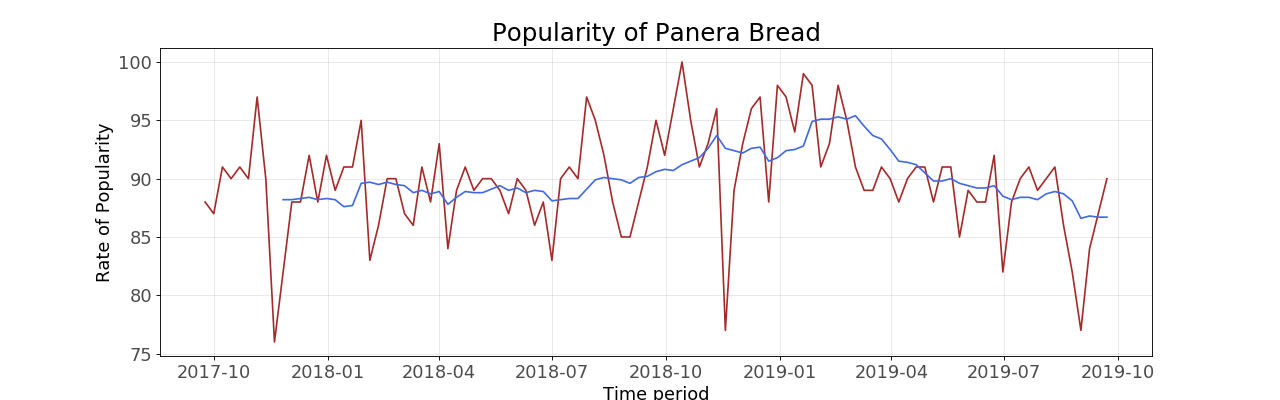

In [104]:
plt.figure(figsize=(16,5), dpi= 80)
plt.plot(Timeline_df['Week'], Timeline_df['Panera Bread'],color='brown')


x_values = Timeline_df["Week"]
y_values = Timeline_df["Panera Bread"]

plt.xticks(rotation=0, fontsize=16, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=16, alpha=.7)
plt.title("Popularity of Panera Bread", fontsize=22)
plt.xlabel('Time period', fontsize=16)
plt.ylabel('Rate of Popularity', fontsize=16)
plt.grid(axis='both', alpha=.3)
rolling_mean = y_values.rolling(window=10).mean()


plt.plot(Timeline_df['Week'], rolling_mean,color='royalblue')
rm_change = (rolling_mean[104]/rolling_mean[9])-1
roll_change.update( {'Panera Bread' : rm_change} )
plt.savefig("../Output/Panera_Bread_Timeline.png")
plt.show()

<IPython.core.display.Javascript object>


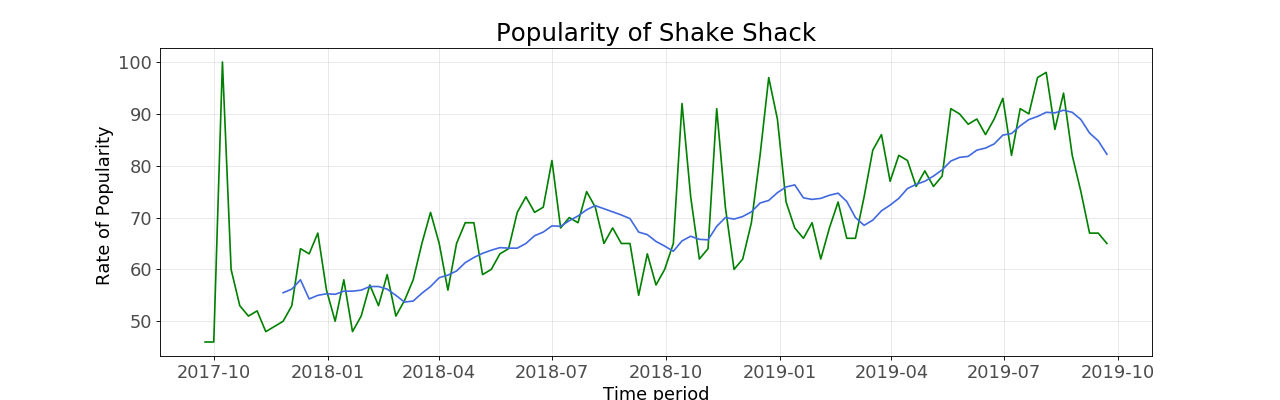

In [103]:
plt.figure(figsize=(16,5), dpi= 80)
plt.plot(Timeline_df['Week'], Timeline_df['Shake Shack'],color='green')


x_values = Timeline_df["Week"]
y_values = Timeline_df["Shake Shack"]

plt.xticks(rotation=0, fontsize=16, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=16, alpha=.7)
plt.title("Popularity of Shake Shack", fontsize=22)
plt.xlabel('Time period', fontsize=16)
plt.ylabel('Rate of Popularity ', fontsize = 16)
plt.grid(axis='both', alpha=.3)
rolling_mean = y_values.rolling(window=10).mean()


plt.plot(Timeline_df['Week'], rolling_mean,color='royalblue')
rm_change = (rolling_mean[104]/rolling_mean[9])-1
roll_change.update( {'Shake Shack' : rm_change} )
plt.savefig("../Output/Shake_Timeline.png")
plt.show()

<IPython.core.display.Javascript object>


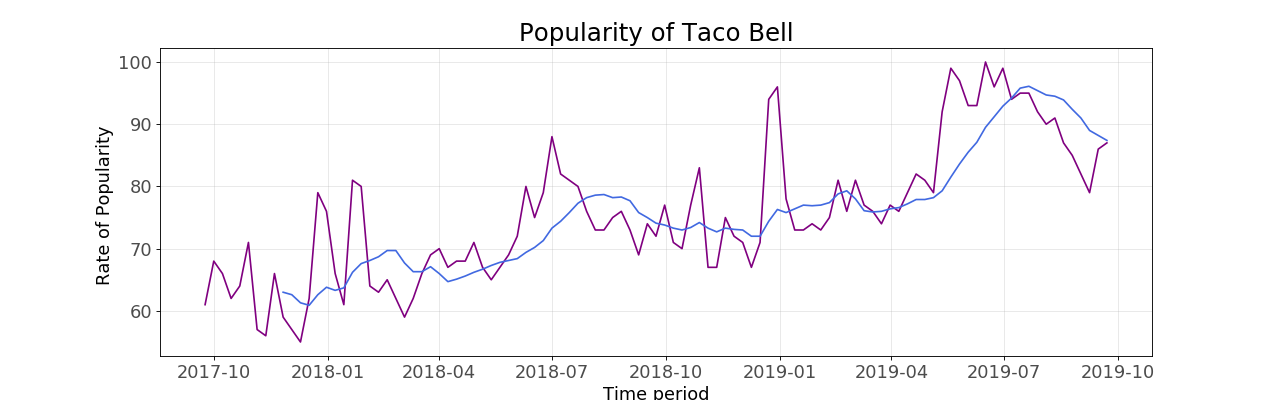

In [102]:
plt.figure(figsize=(16,5), dpi= 80)
plt.plot(Timeline_df['Week'], Timeline_df['Taco Bell'],color='purple')


x_values = Timeline_df["Week"]
y_values = Timeline_df["Taco Bell"]

plt.xticks(rotation=0, fontsize=16, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=16, alpha=.7)
plt.title("Popularity of Taco Bell", fontsize=22)
plt.xlabel('Time period', fontsize = 16)
plt.ylabel('Rate of Popularity ', fontsize = 16)
plt.grid(axis='both', alpha=.3)
rolling_mean = y_values.rolling(window=10).mean()


plt.plot(Timeline_df['Week'], rolling_mean,color='royalblue')
rm_change = (rolling_mean[104]/rolling_mean[9])-1
roll_change.update( {'Taco Bell' : rm_change} )
plt.savefig("../Output/Taco_Timeline.png")
plt.show()

<IPython.core.display.Javascript object>


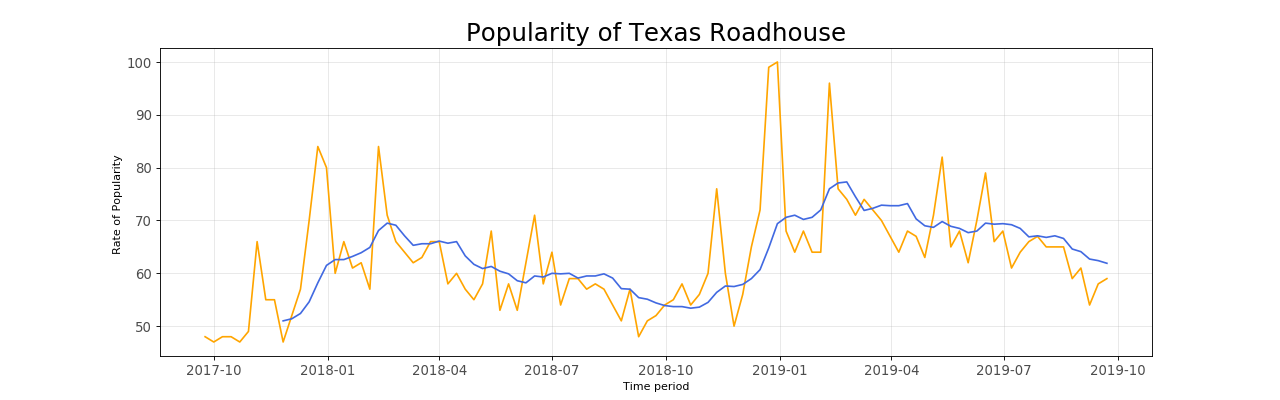

In [96]:
plt.figure(figsize=(16,5), dpi= 80)
plt.plot(Timeline_df['Week'], Timeline_df['Texas Roadhouse'],color='orange')


x_values = Timeline_df["Week"]
y_values = Timeline_df["Texas Roadhouse"]

plt.xticks(rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Popularity of Texas Roadhouse", fontsize=22)
plt.xlabel('Time period')
plt.ylabel('Rate of Popularity ')
plt.grid(axis='both', alpha=.3)
rolling_mean = y_values.rolling(window=10).mean()


plt.plot(Timeline_df['Week'], rolling_mean,color='royalblue')
rm_change = (rolling_mean[104]/rolling_mean[9])-1
roll_change.update( {'Texas Roadhouse' : rm_change} )
plt.savefig("../Output/Texas_Timeline.png")
plt.show()

In [97]:
print(roll_change)

{'Chipotle': 0.1640625, 'Five Guys': 0.1411290322580645, 'Halal Guys': 0.13857142857142857, 'McDonalds': 0.1306532663316582, 'Panera Bread': -0.017006802721088454, 'Shake Shack': 0.48108108108108105, 'Taco Bell': 0.3873015873015875, 'Texas Roadhouse': 0.21372549019607834}


In [98]:
index = [0]
roll_df = pd.DataFrame(roll_change, index=index)

In [99]:
roll_df 

,Chipotle,Five Guys,Halal Guys,McDonalds,Panera Bread,Shake Shack,Taco Bell,Texas Roadhouse
0,0.164062,0.141129,0.138571,0.130653,-0.017007,0.481081,0.387302,0.213725


In [2]:
%matplotlib notebook

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
Combined_df = pd.read_csv("Combined_GeoMap.csv")
Combined_df.head()

,Region,Chipotle,Five Guys,Halal Guys,McDonalds,Panera bread,Shake Shack,Taco Bell,Texas Roadhouse
0,Alabama,21,54,0,80,76,12,87,38
1,Alaska,9,7,0,59,4,4,55,50
2,Arizona,59,45,31,78,49,25,75,61
3,Arkansas,17,28,0,90,41,8,90,44
4,California,46,35,57,64,43,30,58,13


In [45]:
Combined_df.fillna("0")
Combined_df

,Region,Chipotle,Five Guys,Halal Guys,McDonalds,Panera bread,Shake Shack,Taco Bell,Texas Roadhouse
0,Alabama,21,54,0,80,76,12,87,38
1,Alaska,9,7,0,59,4,4,55,50
2,Arizona,59,45,31,78,49,25,75,61
3,Arkansas,17,28,0,90,41,8,90,44
4,California,46,35,57,64,43,30,58,13
5,Colorado,54,44,4,64,66,20,68,61
6,Connecticut,34,72,37,61,89,46,40,36
7,Delaware,37,71,0,72,88,43,49,80
8,District of Columbia,83,100,64,74,74,99,43,38
9,Florida,48,64,17,78,85,27,66,37


In [6]:
Combined_df.dtypes

Region             object
Chipotle            int64
Five Guys           int64
Halal Guys          int64
McDonalds           int64
Panera bread        int64
Shake Shack         int64
Taco Bell           int64
Texas Roadhouse     int64
dtype: object

In [7]:
Combined_df['Halal Guys'] = Combined_df['Halal Guys'].astype(int)
Combined_df.dtypes

Region             object
Chipotle            int64
Five Guys           int64
Halal Guys          int32
McDonalds           int64
Panera bread        int64
Shake Shack         int64
Taco Bell           int64
Texas Roadhouse     int64
dtype: object

In [9]:
Combined_df.to_csv('Combined_GeoMap.csv')
Combined_df.head()

,Region,Chipotle,Five Guys,Halal Guys,McDonalds,Panera bread,Shake Shack,Taco Bell,Texas Roadhouse
0,Alabama,21,54,0,80,76,12,87,38
1,Alaska,9,7,0,59,4,4,55,50
2,Arizona,59,45,31,78,49,25,75,61
3,Arkansas,17,28,0,90,41,8,90,44
4,California,46,35,57,64,43,30,58,13


In [10]:
float_col = Combined_df.select_dtypes(include = ['int32'])
for col in float_col.columns.values:
    Combined_df[col] = Combined_df[col].astype('int64')

In [11]:
Combined_df.dtypes

Region             object
Chipotle            int64
Five Guys           int64
Halal Guys          int64
McDonalds           int64
Panera bread        int64
Shake Shack         int64
Taco Bell           int64
Texas Roadhouse     int64
dtype: object

In [13]:
Combined_df.to_csv('Combined_GeoMap.csv')
Combined_df.head()

,Region,Chipotle,Five Guys,Halal Guys,McDonalds,Panera bread,Shake Shack,Taco Bell,Texas Roadhouse
0,Alabama,21,54,0,80,76,12,87,38
1,Alaska,9,7,0,59,4,4,55,50
2,Arizona,59,45,31,78,49,25,75,61
3,Arkansas,17,28,0,90,41,8,90,44
4,California,46,35,57,64,43,30,58,13


In [16]:
x_axis = np.arange(len(Combined_df))
tick_locations = [value for value in x_axis]

<IPython.core.display.Javascript object>


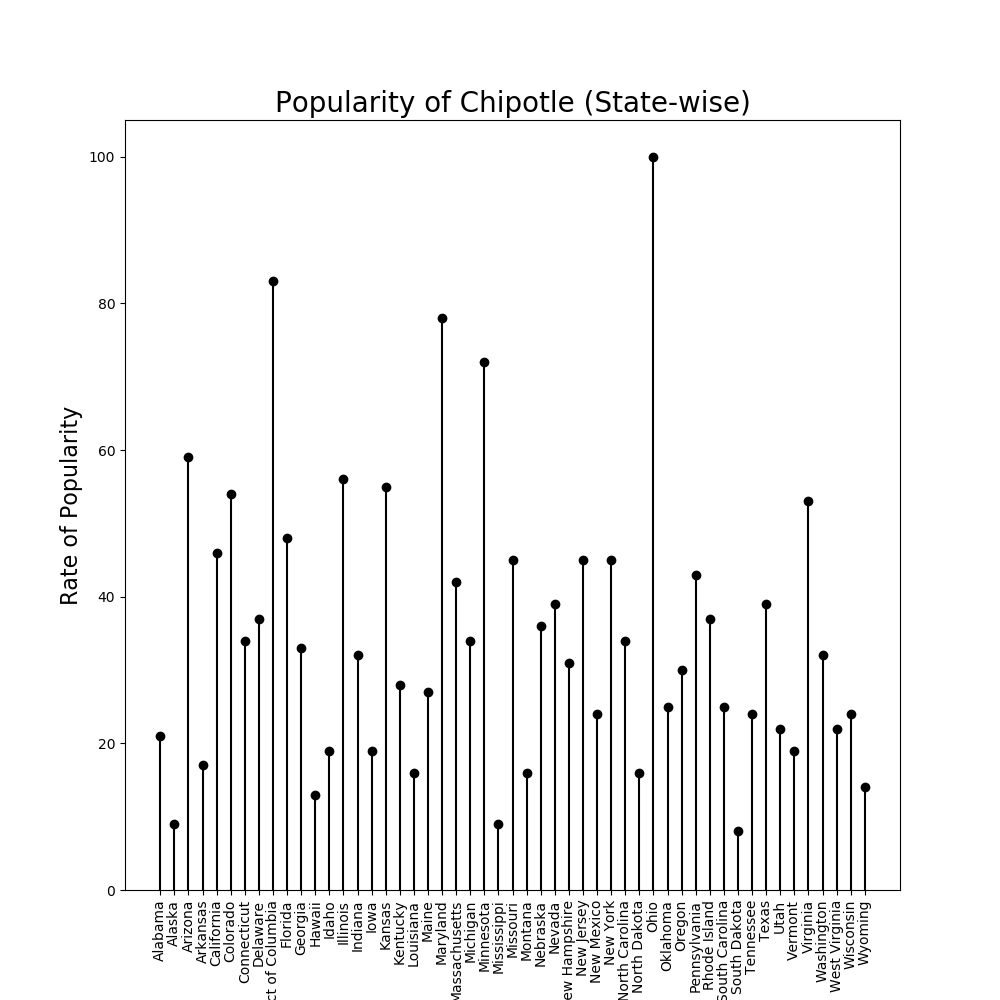

C:\Users\woodf\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


In [20]:
plt.figure(figsize=(10,10))

(markerline, stemlines, baseline) = plt.stem(Combined_df['Region'],
                                             Combined_df['Chipotle'])
plt.setp(markerline, marker='o', markersize=5, markeredgewidth=2, color='black')

plt.setp(stemlines, color='black')
plt.setp(baseline, visible=False)

plt.xticks(tick_locations, Combined_df["Region"], rotation="vertical")
plt.title("Popularity of Chipotle (State-wise)", fontsize=20)
plt.xlabel('States', size=16)
plt.ylabel('Rate of Popularity', size=16)
plt.ylim(bottom=0)
plt.savefig("../Output/Chipotle_GeoMap.png")
plt.show()
 

In [ ]:
plt.figure(figsize=(10,16))

(markerline, stemlines, baseline) = plt.stem(Combined_df['Region'],
                                             Combined_df['Five Guys'])
plt.setp(markerline, marker='o', markersize=5, markeredgewidth=2, color='red')

plt.setp(stemlines, color='red')
plt.setp(baseline, visible=False)

plt.xticks(tick_locations, Combined_df["Region"], rotation="vertical")
plt.title("Popularity of Five Guys (State-wise)", fontsize=20)
plt.xlabel('States', size=12)
plt.ylabel('Rate of Popularity', size=12)
plt.ylim(bottom=0)
plt.savefig("Output Plots/Five Guys_GeoMap.png")
plt.show()

<IPython.core.display.Javascript object>


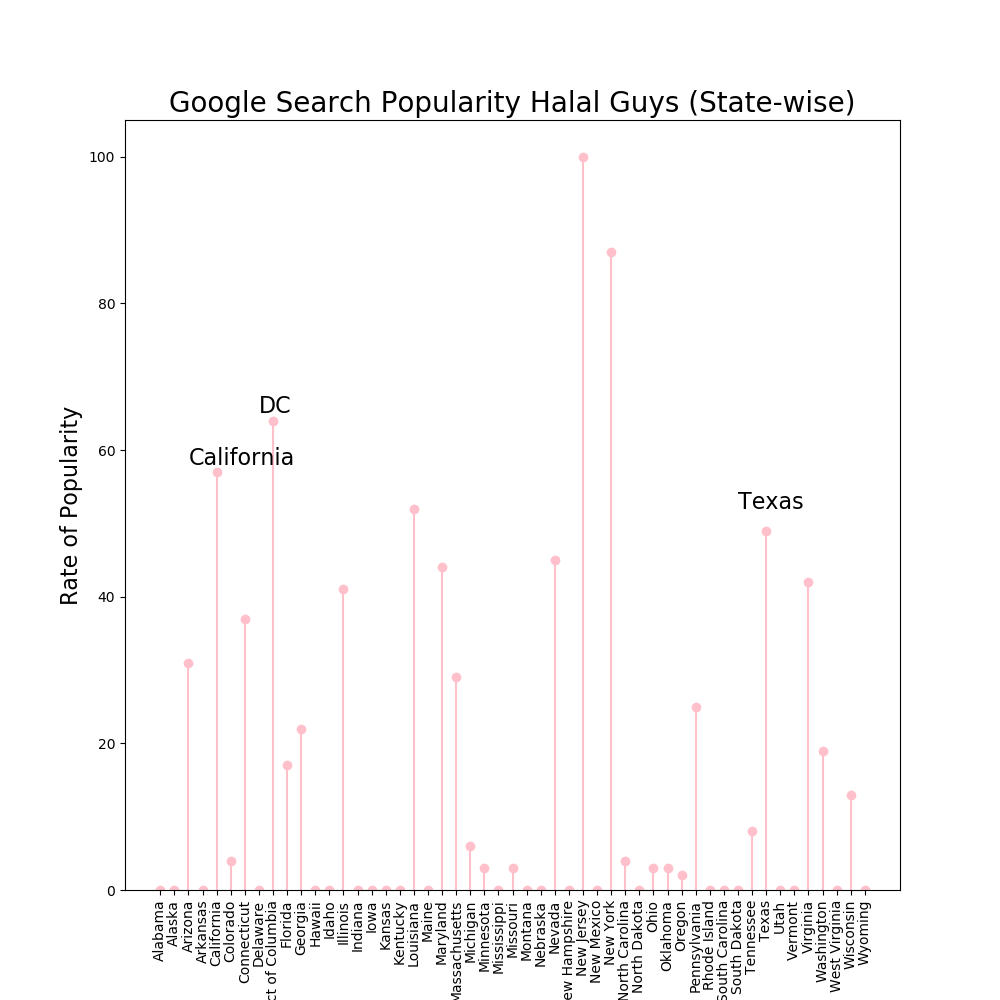

C:\Users\woodf\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


In [46]:
plt.figure(figsize=(10,10))

(markerline, stemlines, baseline) = plt.stem(Combined_df['Region'],
                                             Combined_df['Halal Guys'])
plt.setp(markerline, marker='o', markersize=5, markeredgewidth=2, color='pink')

plt.setp(stemlines, color='pink')
plt.setp(baseline, visible=False)

plt.xticks(tick_locations, Combined_df["Region"], rotation="vertical")
plt.title("Google Search Popularity Halal Guys (State-wise)", fontsize=20)
plt.xlabel('States', size=16)
plt.ylabel('Rate of Popularity', size=16)
plt.ylim(bottom=0)

plt.annotate("California", (2,58), fontsize = 16, color = "black")
plt.annotate("DC", (7,65), fontsize = 16, color = "black")
plt.annotate("Texas", (41,52), fontsize = 16, color = "black")
plt.savefig("../Output/Halal Guys_GeoMap.png")
plt.show()

<IPython.core.display.Javascript object>


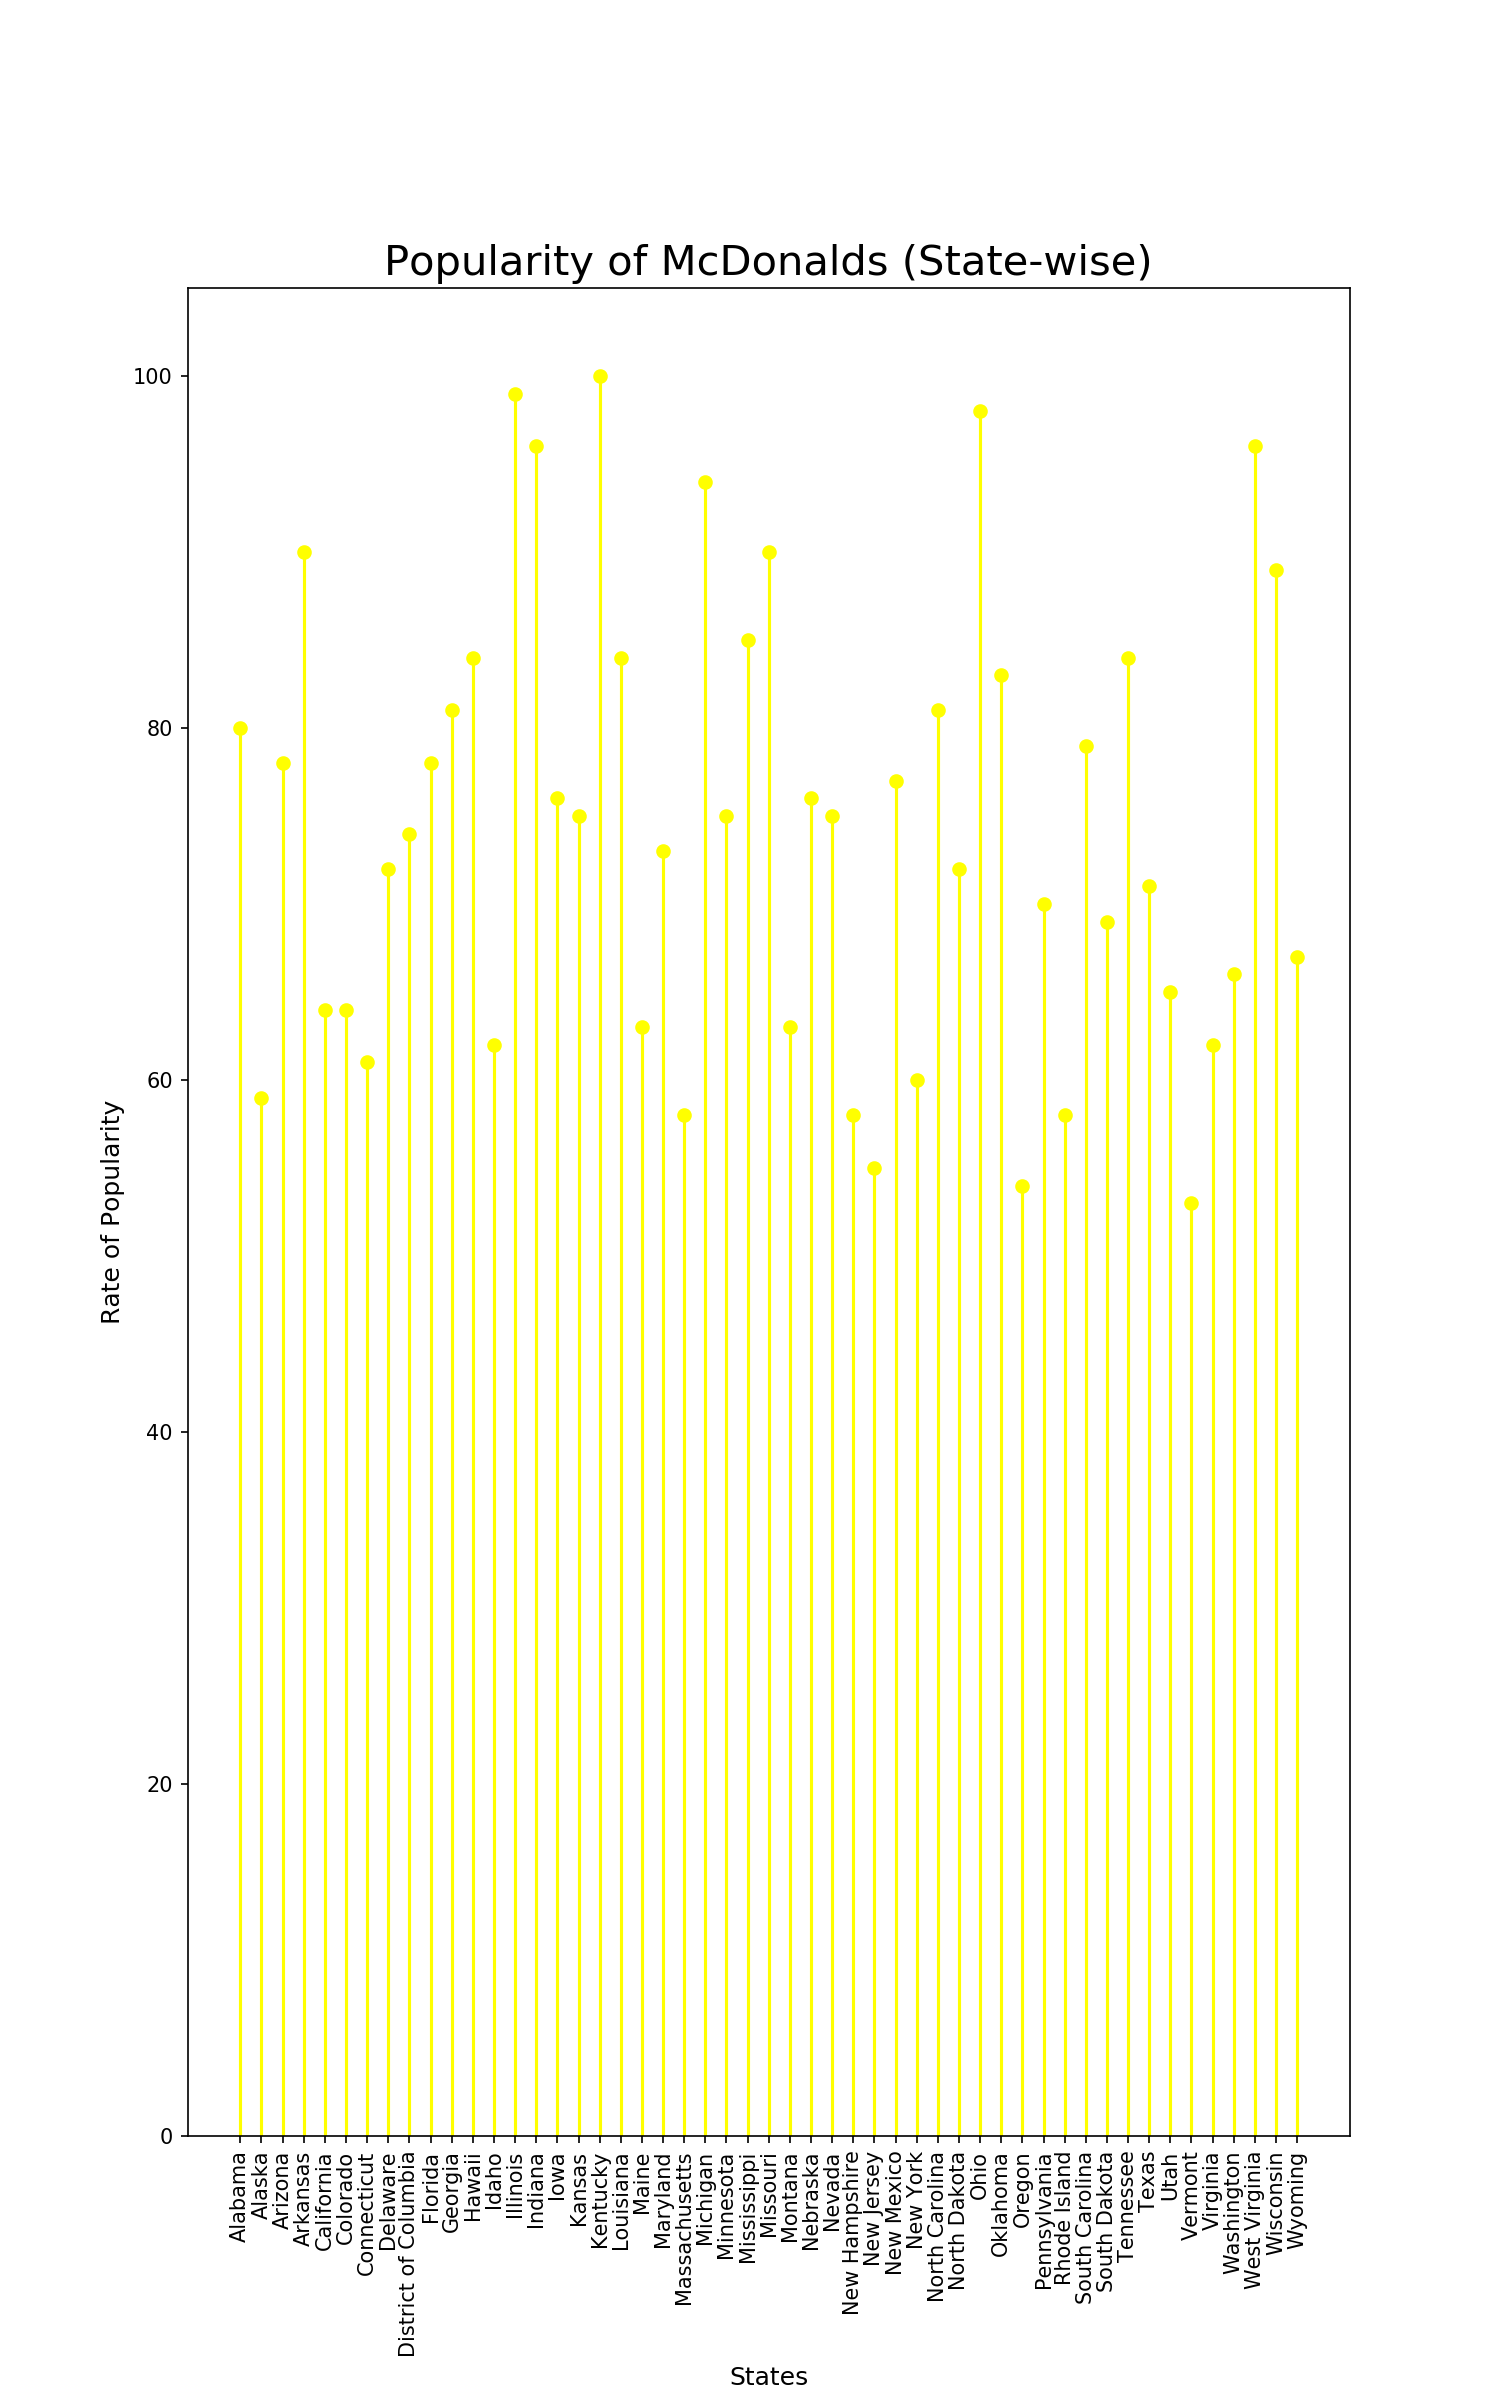

C:\Users\Sarah Paul\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


In [83]:
plt.figure(figsize=(10,16))

(markerline, stemlines, baseline) = plt.stem(Combined_df['Region'],
                                             Combined_df['McDonalds'])
plt.setp(markerline, marker='o', markersize=5, markeredgewidth=2, color='yellow')

plt.setp(stemlines, color='yellow')
plt.setp(baseline, visible=False)

plt.xticks(tick_locations, Combined_df["Region"], rotation="vertical")
plt.title("Popularity of McDonalds (State-wise)", fontsize=20)
plt.xlabel('States', size=16)
plt.ylabel('Rate of Popularity', size=12)
plt.ylim(bottom=0)
plt.savefig("Output Plots/McDonalds_GeoMap.png")
plt.show()

<IPython.core.display.Javascript object>


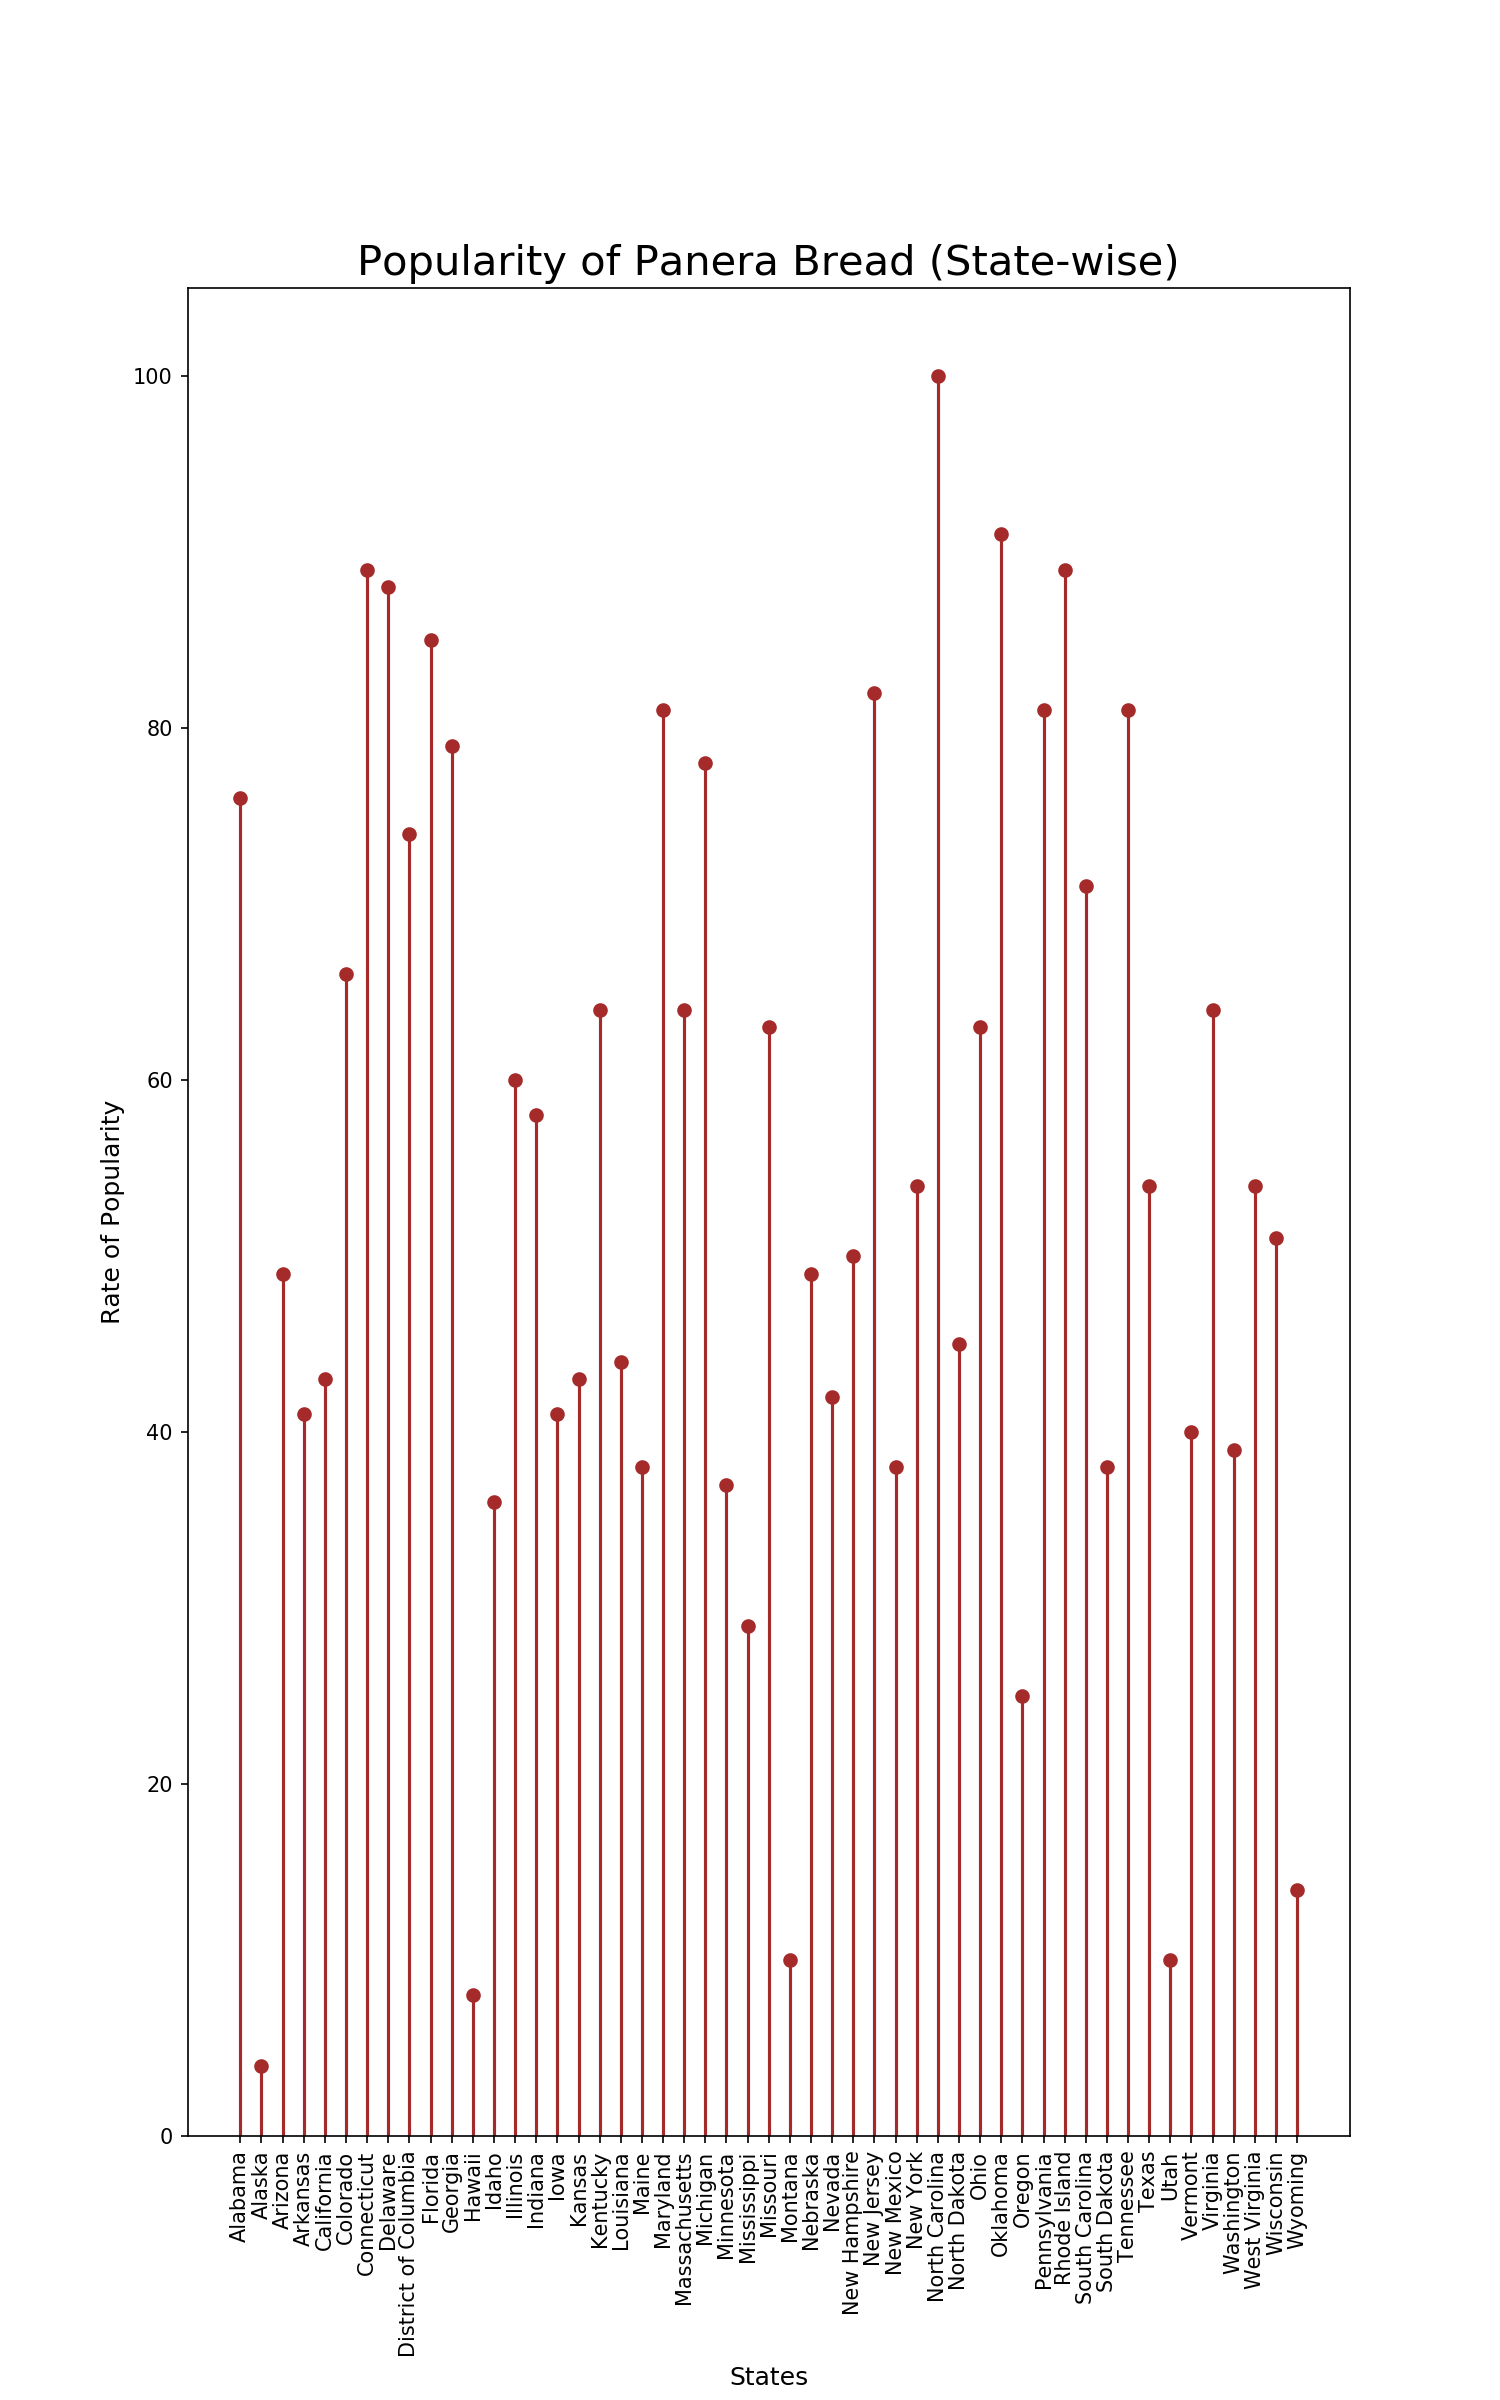

C:\Users\Sarah Paul\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


In [86]:
plt.figure(figsize=(10,16))

(markerline, stemlines, baseline) = plt.stem(Combined_df['Region'],
                                             Combined_df['Panera bread'])
plt.setp(markerline, marker='o', markersize=5, markeredgewidth=2, color='brown')

plt.setp(stemlines, color='brown')
plt.setp(baseline, visible=False)

plt.xticks(tick_locations, Combined_df["Region"], rotation="vertical")
plt.title("Popularity of Panera Bread (State-wise)", fontsize=20)
plt.xlabel('States', size=12)
plt.ylabel('Rate of Popularity', size=12)
plt.ylim(bottom=0)
plt.savefig("Output Plots/Panera Bread_GeoMap.png")
plt.show()

<IPython.core.display.Javascript object>


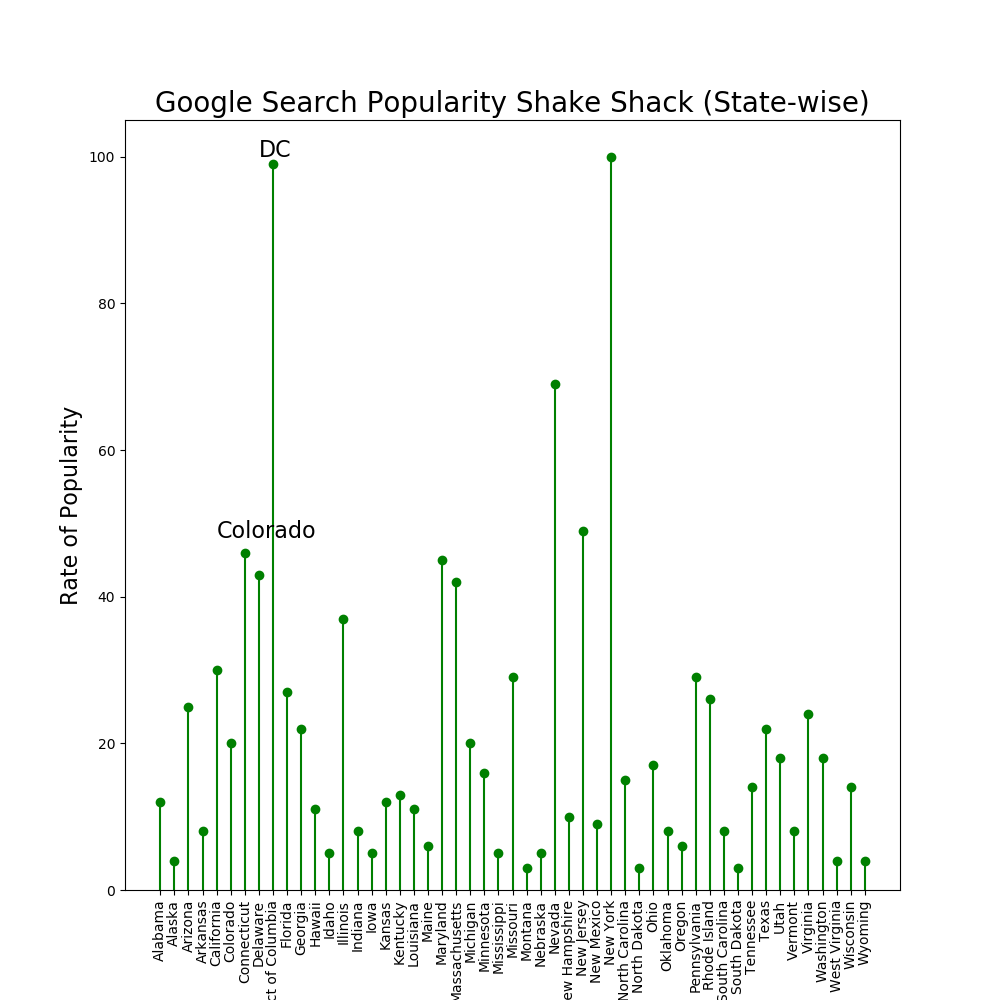

C:\Users\woodf\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


In [51]:
plt.figure(figsize=(10,10))

(markerline, stemlines, baseline) = plt.stem(Combined_df['Region'],
                                             Combined_df['Shake Shack'])
plt.setp(markerline, marker='o', markersize=5, markeredgewidth=2, color='green')

plt.setp(stemlines, color='green')
plt.setp(baseline, visible=False)

plt.xticks(tick_locations, Combined_df["Region"], rotation="vertical")
plt.title("Google Search Popularity Shake Shack (State-wise)", fontsize=20)
plt.xlabel('States', size=16)
plt.ylabel('Rate of Popularity', size=16)
plt.ylim(bottom=0)
plt.savefig("../Output/Shake Shack_GeoMap.png")
plt.annotate("Colorado", (4,48), fontsize = 16, color = "black")
plt.annotate("DC", (7,100), fontsize = 16, color = "black")
plt.savefig("../Output/Shake Shack_GeoMap.png")
plt.show()

<IPython.core.display.Javascript object>


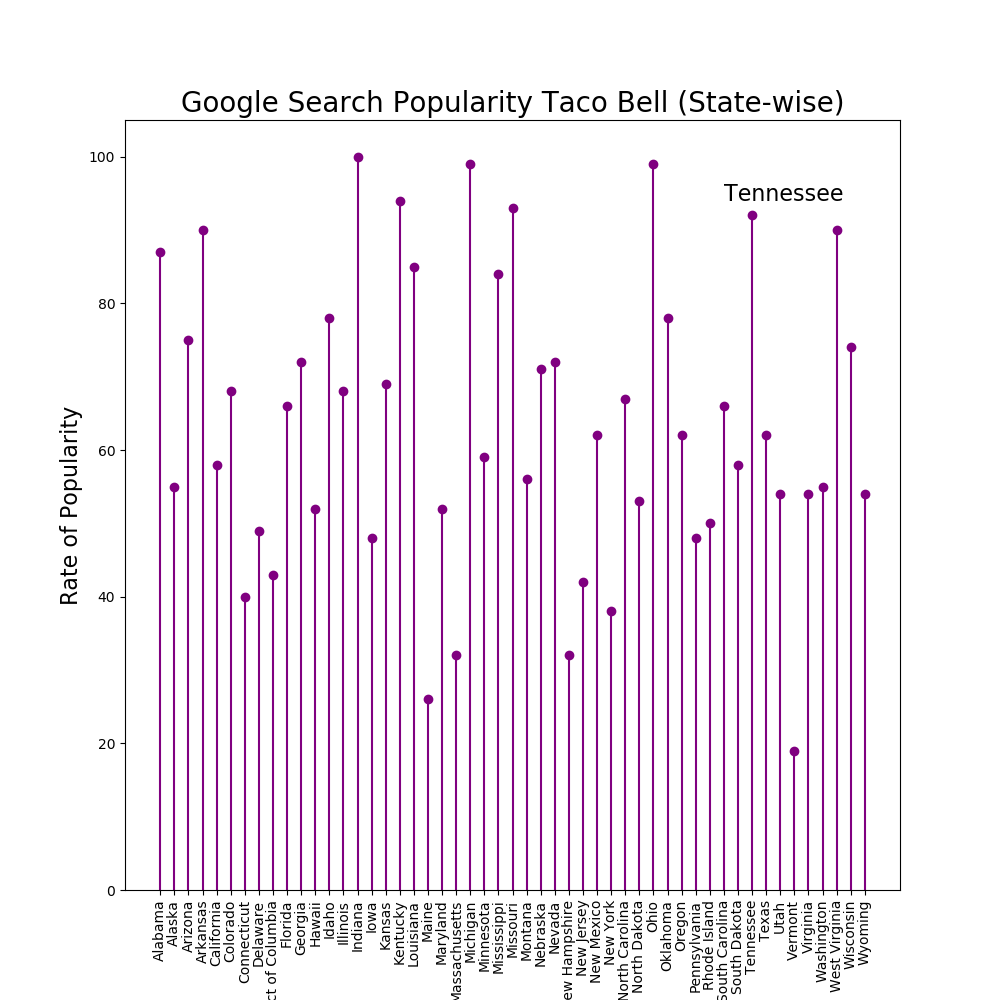

C:\Users\woodf\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


In [53]:
plt.figure(figsize=(10,10))

(markerline, stemlines, baseline) = plt.stem(Combined_df['Region'],
                                             Combined_df['Taco Bell'])
plt.setp(markerline, marker='o', markersize=5, markeredgewidth=2, color='purple')

plt.setp(stemlines, color='purple')
plt.setp(baseline, visible=False)

plt.xticks(tick_locations, Combined_df["Region"], rotation="vertical")
plt.title("Google Search Popularity Taco Bell (State-wise)", fontsize=20)
plt.xlabel('States', size=16)
plt.ylabel('Rate of Popularity', size=16)
plt.ylim(bottom=0)
plt.annotate("Tennessee", (40,94), fontsize = 16, color = "black")
plt.savefig("../Output/Taco Bell_GeoMap.png")
plt.show()

<IPython.core.display.Javascript object>


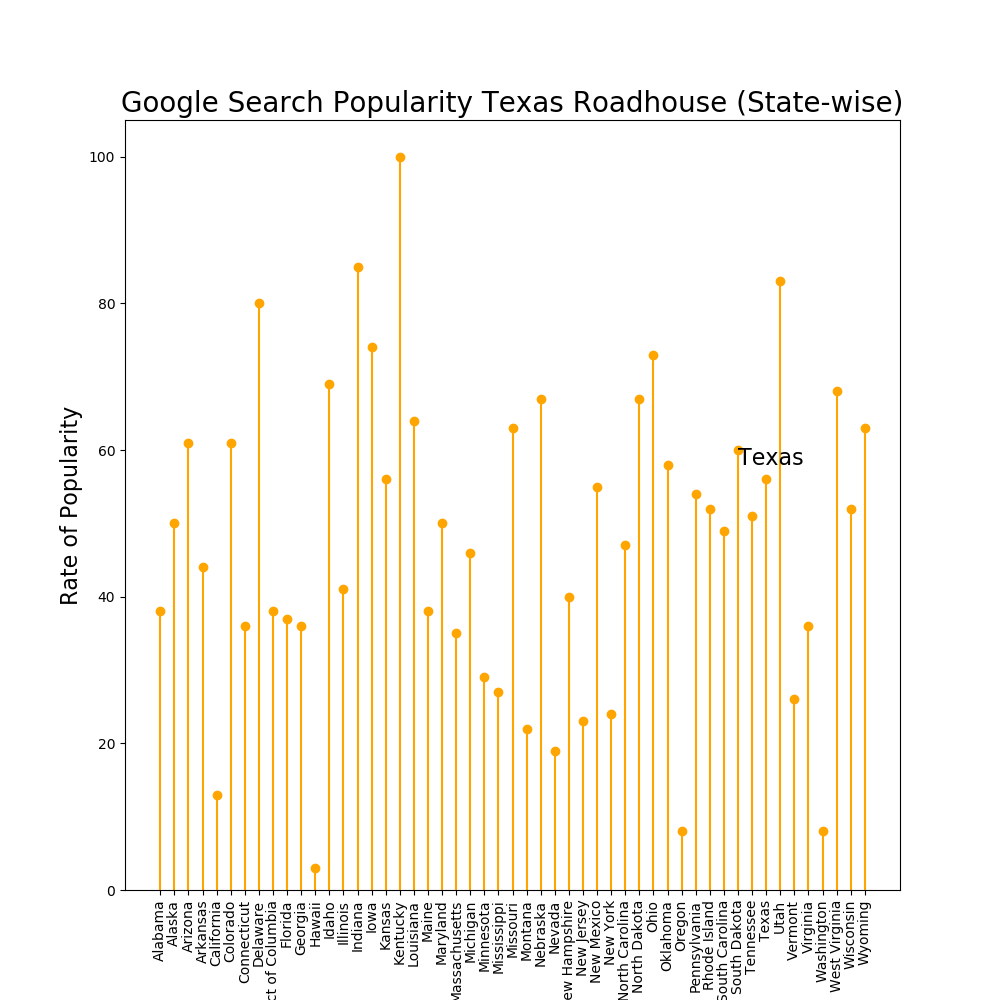

C:\Users\woodf\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


In [54]:
plt.figure(figsize=(10,10))

(markerline, stemlines, baseline) = plt.stem(Combined_df['Region'],
                                             Combined_df['Texas Roadhouse'])
plt.setp(markerline, marker='o', markersize=5, markeredgewidth=2, color='orange')

plt.setp(stemlines, color='orange')
plt.setp(baseline, visible=False)

plt.xticks(tick_locations, Combined_df["Region"], rotation="vertical")
plt.title("Google Search Popularity Texas Roadhouse (State-wise)", fontsize=20)
plt.xlabel('States', size=16)
plt.ylabel('Rate of Popularity', size=16)
plt.ylim(bottom=0)
plt.annotate("Texas", (41,58), fontsize = 16, color = "black")
plt.savefig("../Output/Texas Roadhouse_GeoMap.png")
plt.show()